In **Linear Regression** predicted value is continuous.

In **Logistic Regression** predicted value is categorical(Used to slove the **classification** technique).
* **Binary Classification**: When outcome is simply yes or no.
* **Multiclass Classification**: When there is more then two categories that example is called multiclass Classification.

In **logistic Regression** we can drow the logistic equation line using **sigmoid/logit** function.
* **Sigmoid/Logit Function**: This mathmetical logic function has a characteristic **s** shaped curve. Sigmoid function example is:
\begin{equation*}
S(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^x+1}\\
\end{equation*}
here, e = Euler's Numbber,  which is  approximately 2.71828.
  
   In this function we are dividing 1 by a number which is slightly greater then 1. So, the outcome will be less than 1. So, sigmoid function converts input into range of 0-1. So, if we feed a set of numbers to the sigmoid function, it will convert them to **zero** to **one** range and the equation will look like s shaped.
* **Logistic Cureve**:
<img src="Logistic-curve.svg" style = "width:400px; height:250px"/>

We got **s** shaped line, because we apply **sigmoid** function on the **linear equation**. Like:
<img src="LLr.png" style = "width:700px;height:300px">

## Logistic Regression using sklearn librery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./CSV_Files/insurance_data.csv')

df.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


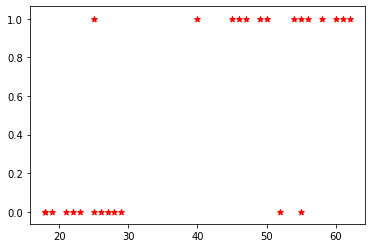

In [2]:
plt.scatter(df.age,df.bought_insurance, marker='*',color='red')

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size = 0.1)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
lr_model.predict(x_test)

array([1, 1, 0])

In [5]:
x_test

,age
15,55
8,62
19,18


In [6]:
lr_model.score(x_test, y_test)

1.0

We can find the probability of a customar's buying **insurance**.

In [7]:
lr_model.predict_proba(x_test)

array([[0.1152972 , 0.8847028 ],
       [0.0505831 , 0.9494169 ],
       [0.93645122, 0.06354878]])

1st column represents the probability of not buying **insurance**

In [8]:
x_test

,age
15,55
8,62
19,18


## Data analysis for employees

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_em = pd.read_csv('./CSV_Files/HR_comma_sep.csv')

df_em.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [64]:
left = df_em[df_em.left == 1]

left.shape

(3571, 10)

In [65]:
retained = df_em[df_em.left == 0]
retained.shape

(11428, 10)

**Average number for who are left or not**

In [66]:
df_em.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 

From this analysis **satisfaction_level**, **average_montly_hours**, **promotion_last_5years**, **Salary have **impact** of 
empoyee's leaving or retaining in this company.
### Bar charts showing impact of employee salaries on retention

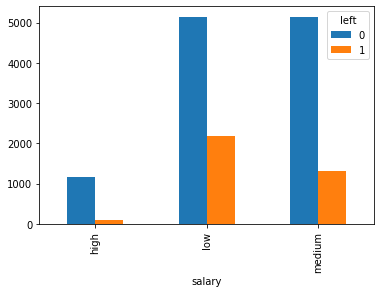

In [67]:
pd.crosstab(df_em.salary, df_em.left).plot(kind = 'bar')

### Bar charts showing impact of employee salaries on retention

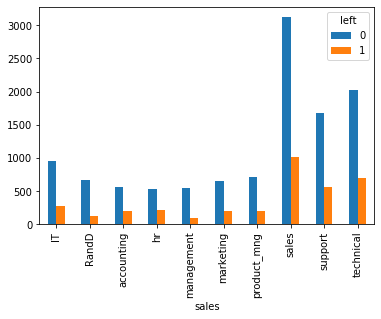

In [68]:
pd.crosstab(df_em.sales, df_em.left).plot(kind = 'bar')

### Making a dataframe using the variables impact on employee's left or retain

In [69]:
impact_data = df_em[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

impact_data.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium


In [70]:
# Find dummy variables for salary.
dv_salary = pd.get_dummies(impact_data.salary)

final = pd.concat([impact_data, dv_salary], axis='columns')

In [71]:
final.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1


In [72]:
final.drop('salary', axis='columns', inplace=True)

In [73]:
final.head(4)

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0


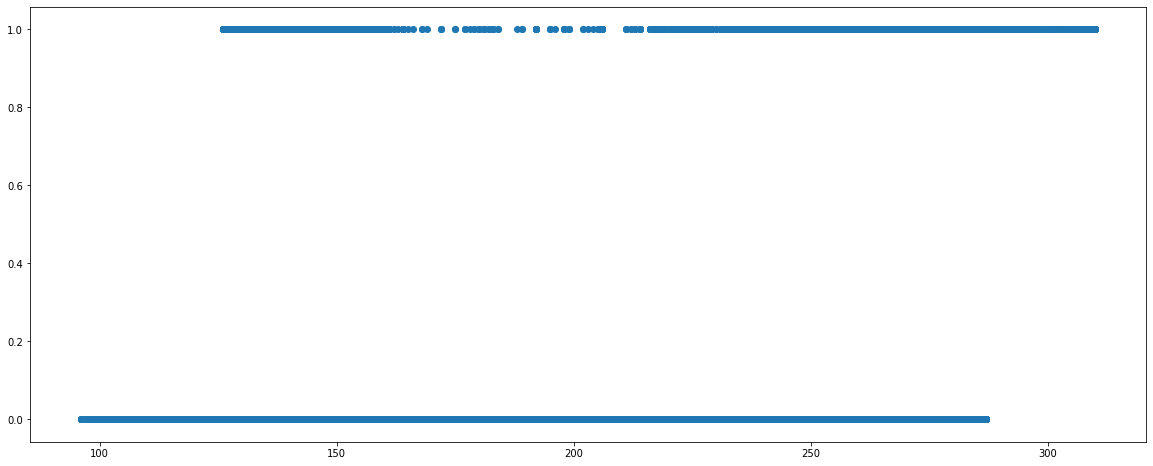

In [74]:
y = df_em.left

plt.figure(figsize=(20, 8))
plt.scatter(final.average_montly_hours, df_em.left)

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final,y, test_size = 0.3)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

### Train model

In [82]:
lr_model.fit(x_train,y_train)

/home/ahmadun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
lr_model.score(x_test,y_test)

0.7768888888888889